# Basic 2-dimensional ODE solution

In [1]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
%config InlineBackend.figure_formats={'retina','png'}

## System definition

To solve the equations
$$
\begin{eqnarray*}
\frac{dx_1}{dt} &=& f_1(x_1, x_2)\\
\frac{dx_2}{dt} &=& f_2(x_1, x_2)
\end{eqnarray*}
$$
define the functions $f_{1,2}$ here.

**Note**, that the functions can explicitly depend on the free variable, to solve the *non-autonomous* equation $\dot{x_i}=f_i(t,x_1,x_2)$, but according to our convention this is no longer 2dim ODE, but 3dim ODE.

In [2]:
def f(t, X):
    x1 = X[0]
    x2 = X[1]
    return [ x1+np.exp(-x2),
             -x2 ]

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

Note the message `'The solver successfully reached the end of the integration interval.'`. It is good to check that it is the case -- sometimes the solver fails to do this!

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.01515152, 0.03030303, 0.04545455, 0.06060606,
       0.07575758, 0.09090909, 0.10606061, 0.12121212, 0.13636364,
       0.15151515, 0.16666667, 0.18181818, 0.1969697 , 0.21212121,
       0.22727273, 0.24242424, 0.25757576, 0.27272727, 0.28787879,
       0.3030303 , 0.31818182, 0.33333333, 0.34848485, 0.36363636,
       0.37878788, 0.39393939, 0.40909091, 0.42424242, 0.43939394,
       0.45454545, 0.46969697, 0.48484848, 0.5       , 0.51515152,
       0.53030303, 0.54545455, 0.56060606, 0.57575758, 0.59090909,
       0.60606061, 0.62121212, 0.63636364, 0.65151515, 0.66666667,
       0.68181818, 0.6969697 , 0.71212121, 0.72727273, 0.74242424,
       0.75757576, 0.77272727, 0.78787879, 0.8030303 , 0.81818182,
       0.83333333, 0.84848485, 0.86363636, 0.87878788, 0.89393939,
       0.90909091,

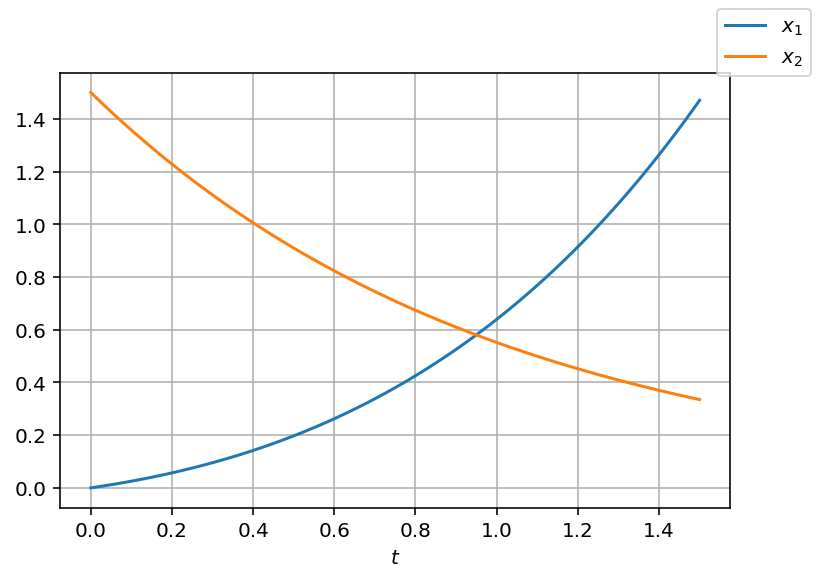

In [3]:
tspan = (0, 1.5) # time range for the solution
x0 = [0.0, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)
print(xs)

fig2, ax2 = plt.subplots(1)

ax2.plot(xs.t, xs.y[0,:], label="$x_1$")
ax2.plot(xs.t, xs.y[1,:], label="$x_2$")
ax2.set_xlabel("$t$")
ax2.grid()
fig2.legend()

We can also plot the trajectory for the same solution

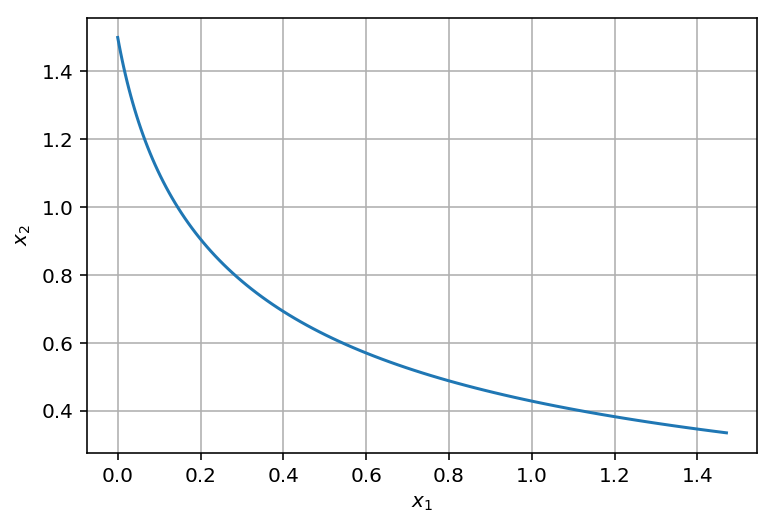

In [4]:
tspan = (0, 1.5) # time range for the solution
x0 = [0.0, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

fig2, ax2 = plt.subplots(1)

ax2.plot(xs.y[0,:], xs.y[1,:])
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.grid()

*Advanced programmers only:* For complicated situations there are many features of `solve_ivp` described in in [SciPy](https://www.scipy.org/) documentation [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=solve_ivp#scipy.integrate.solve_ivp).

Two additional parameters are, however very useful: `rtol` and `atol`.  Setting them to small numbers like `solve_ivp(f, tspan, x0, t_eval=t_eval, rtol=1e-8, atol=1e-8)` asks the solver to aim for higher relative and absolute precision.

## Basic analysis

Let us plot the direction field for the system.

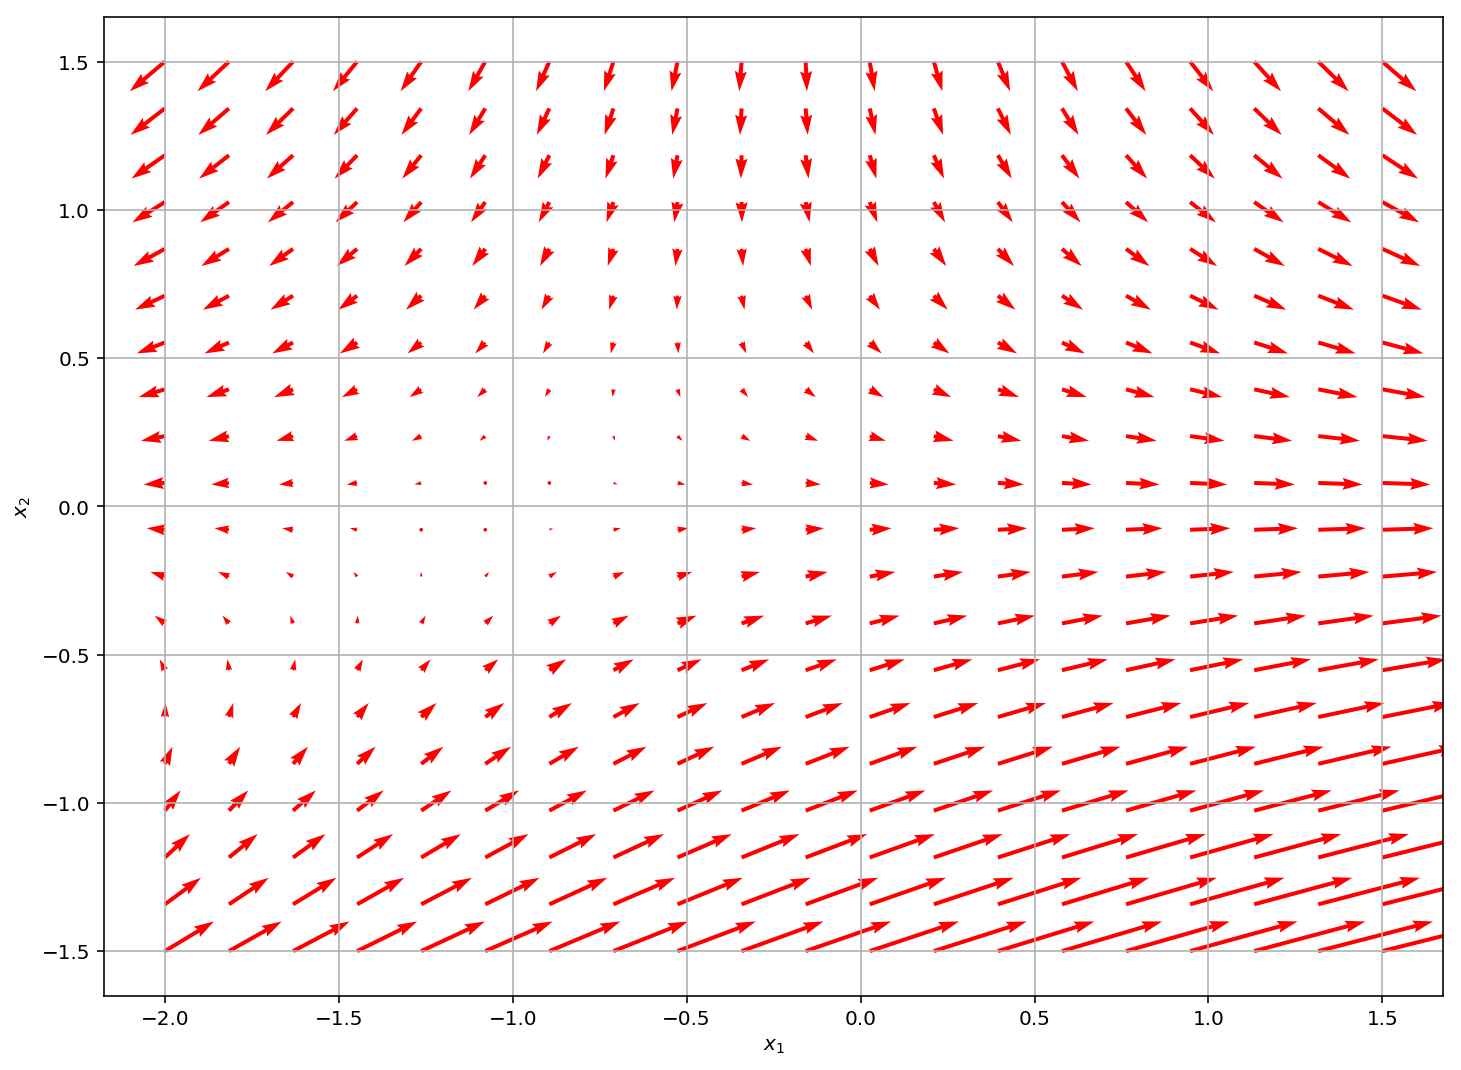

In [5]:
x1range = np.linspace(-2, 1.5, num=20)   # Select the required x_1 range
x2range = np.linspace(-1.5, 1.5, num=20) # Select the required x_2 range
t = 0

# Fill the components of the vector field in the xrid points
U = np.zeros([len(x2range), len(x1range)])
V = np.zeros_like(U)
for i in range(len(x2range)):
    for j in range(len(x1range)):
        U[i,j], V[i,j] = f(t, [x1range[j], x2range[i]])

fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1)

ax.quiver(x1range, x2range, U, V, color='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

We can also ask the system to draw the phase portrait based on the vector field calculated on the grid

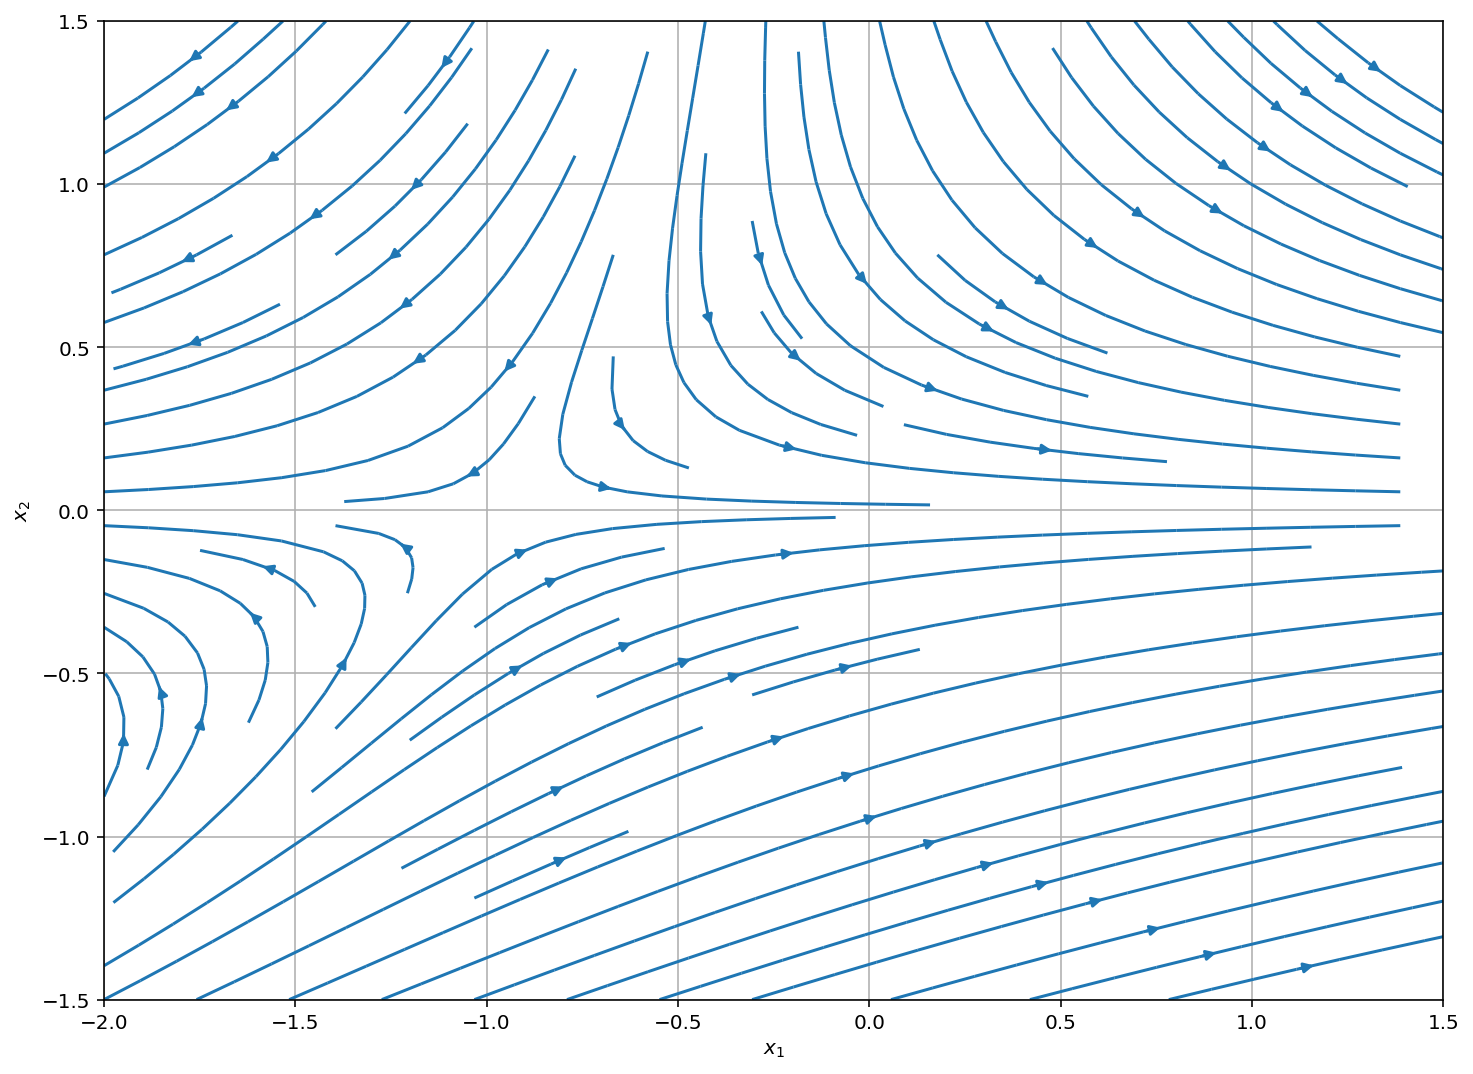

In [6]:
t = 0

x1range = np.linspace(-2, 1.5, num=400) # Select the required x_1 range
x2range = np.linspace(-1.5, 1.5, num=300) # Select the required x_2 range
t = 0

# Fill the components of the vector field in the xrid points
U = np.zeros([len(x2range), len(x1range)])
V = np.zeros_like(U)
for i in range(len(x2range)):
    for j in range(len(x1range)):
        U[i,j], V[i,j] = f(t, [x1range[j], x2range[i]])

fig2 = plt.figure(figsize=(12,9))
ax2 = fig2.subplots(1)
#ax2=ax

ax2.streamplot(x1range, x2range, U, V)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid()
#fig

A good touch if you want -- add _nullclines_. However, you have to solve the equations $\dot{f_i}=$ yourself first.

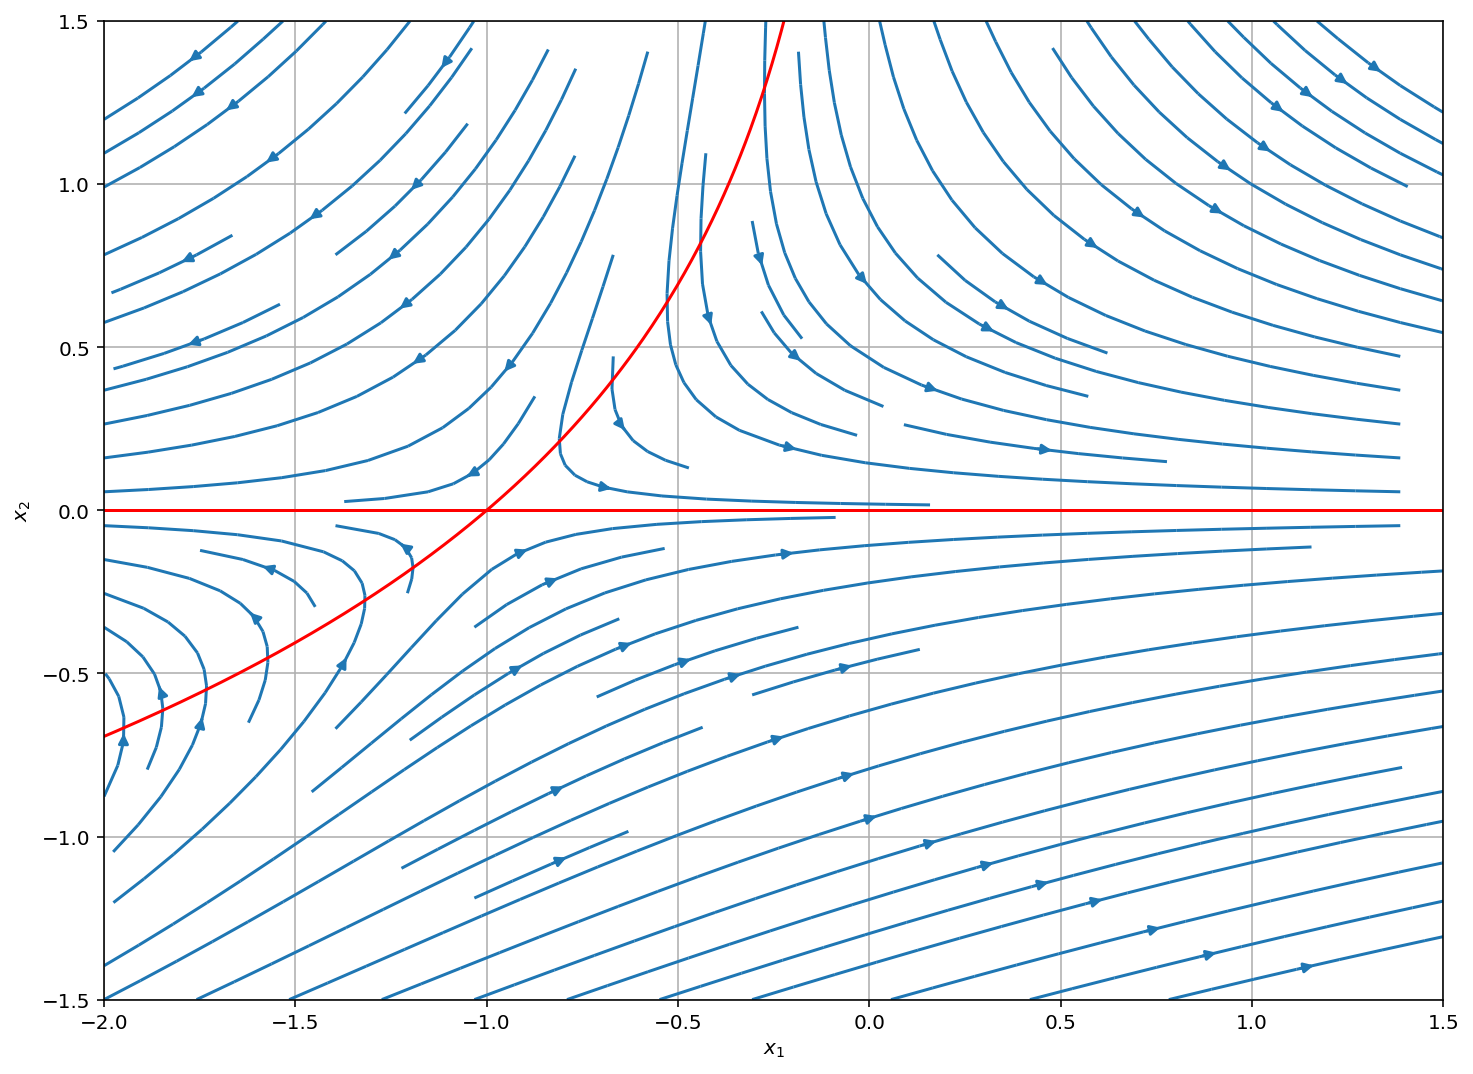

In [7]:
# nullcline dot(x_2)=0: x_2=0
ax2.plot(x1range, np.zeros_like(x1range), color="red")
# nullcline dot(x1)=0: x_1=-exp(-x_2)
ax2.plot(-np.exp(-x2range), x2range, color="red")
ax2.set_xlim(-2,1.5)

fig2

## Trajectories

Let us plot the trajectory for the same solution. Circle and box mark the initial and final points.

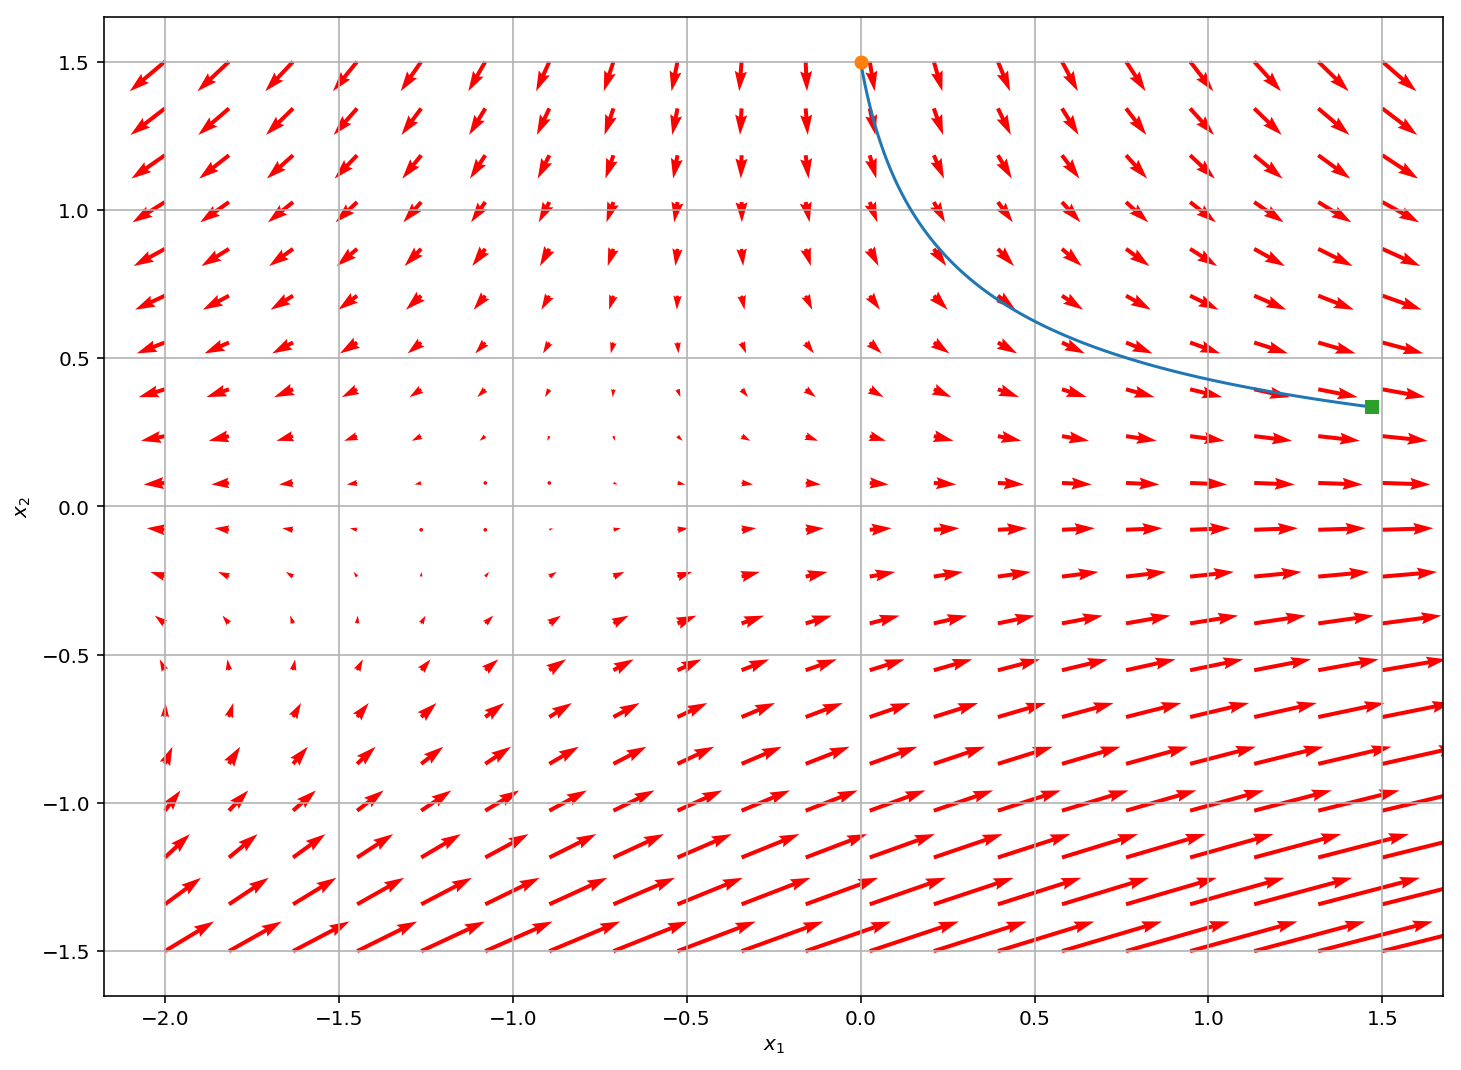

In [8]:
tspan = (0, 1.5)
x0 = [0.0, 1.5]

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

## Uncomment the following line if you do not want the direction field plot
# fig, ax = plt.subplots(1)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us add one more trajectory.

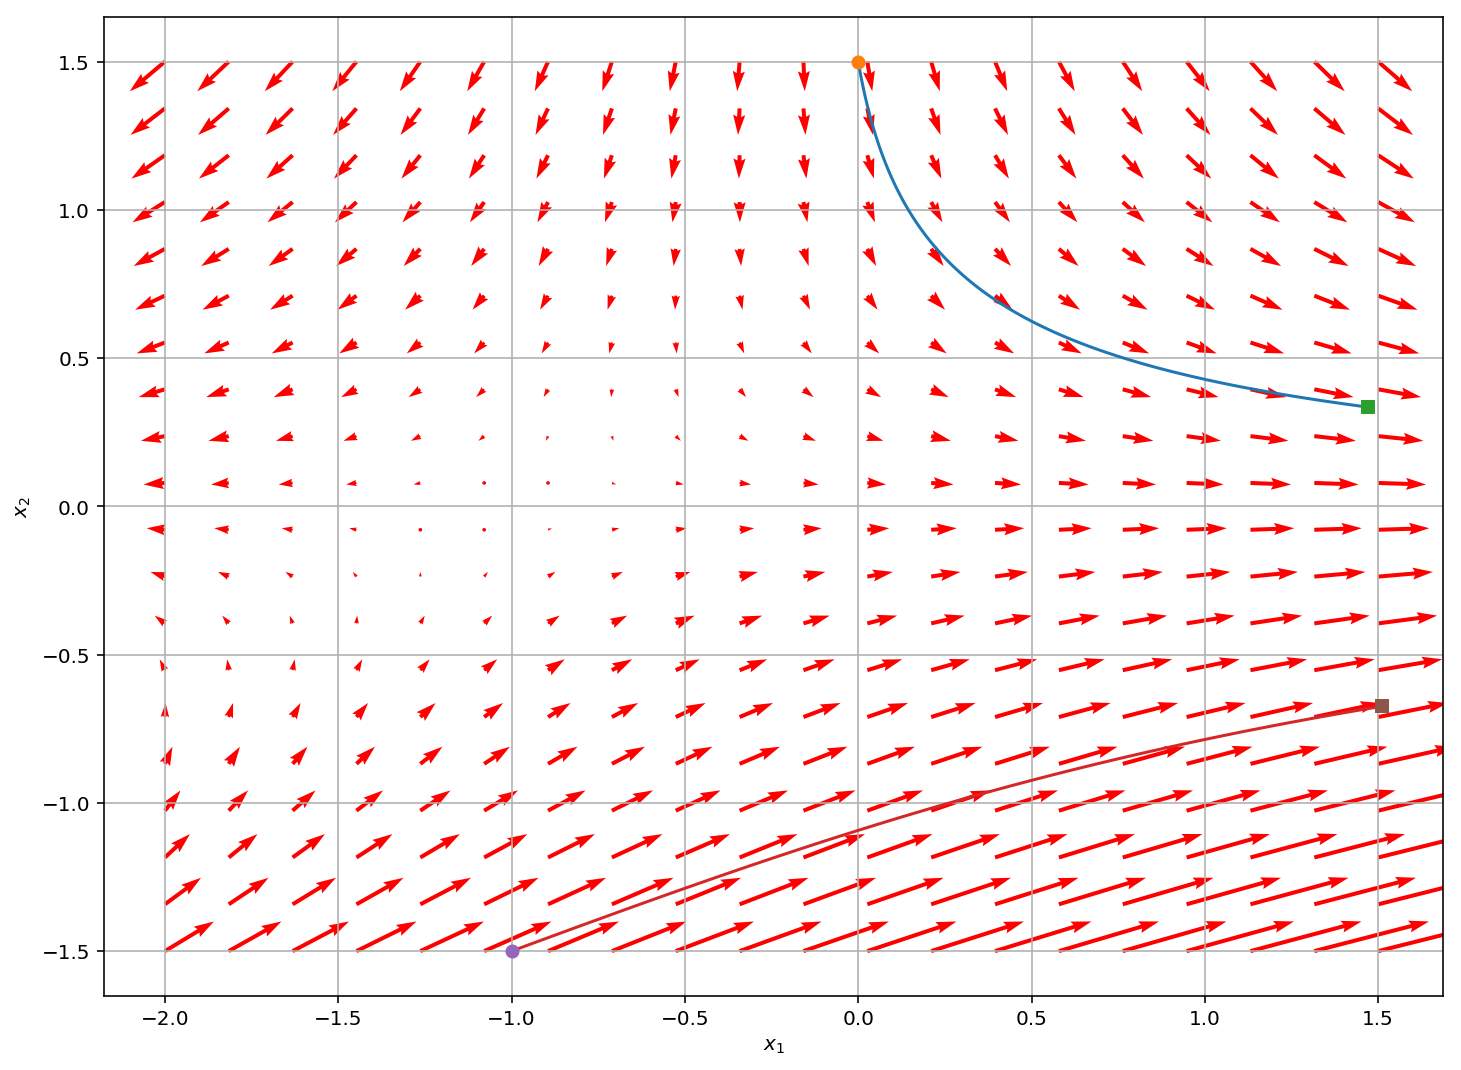

In [9]:
tspan = (0, 0.8)
x0 = [-1., -1.5]

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us plot several more at once

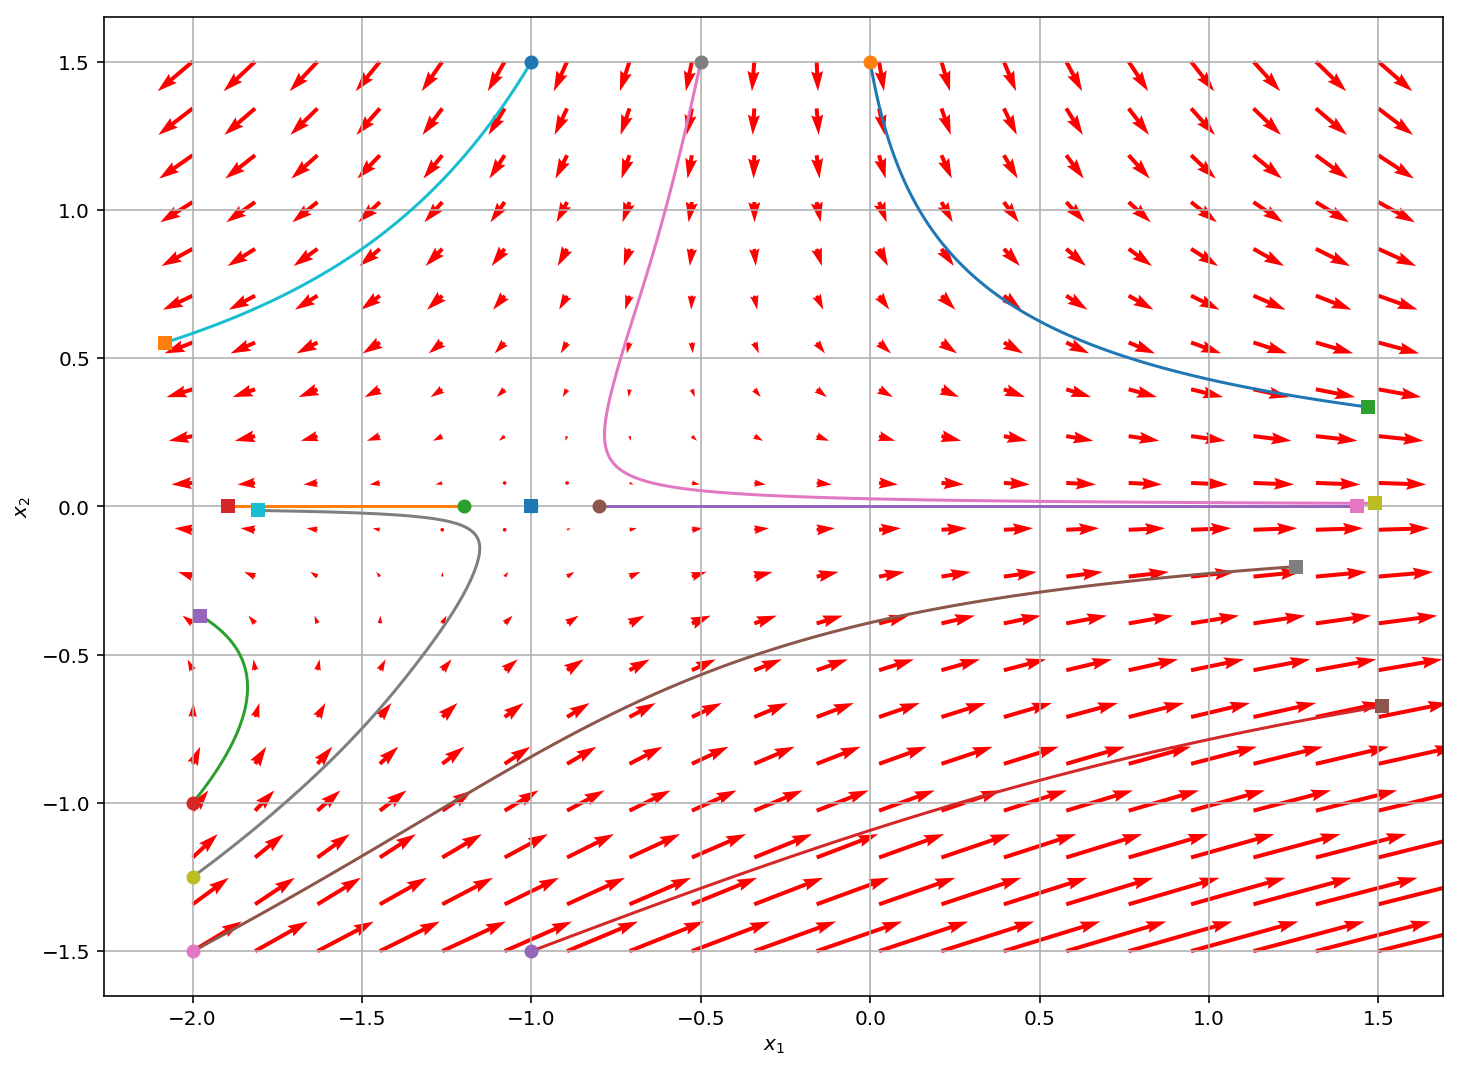

In [10]:
# Give a list of initial positions and integration times [x1,x2,tmax]
for x10,x20,tmax in [[-0.5,1.5,5], [-1,1.5,1], [-2,-1,1], [-2,-1.5,2],
                    [-1,0,1], [-1.2,0,1.5], [-0.8,0,2.5],
                    [-2,-1.25,4.5]]:
    tspan = (0, tmax)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    x0 = [x10, x20]
    xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

    ax.plot(xs.y[0,:], xs.y[1,:])
    ax.plot(xs.y[0,0], xs.y[1,0], 'o')
    ax.plot(xs.y[0,-1], xs.y[1,-1], 's')

fig